# Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from src.distances import euclidean_distances, chebyshev_distances,\
    cosine_distances, convert_distance_to_similarity
from src.graph import similarity_matrix_to_graph, plot_graph
from src.clustering import hierarchical_clustering, kmeans_clustering, em_clustering, spectral_clustering

sns.set_theme()

Считаем данные

In [2]:
data_x = pd.read_excel('data/X_4_2.xlsx', header=None)
data_x.head()

,0,1,2,3
0,4.874290,1.977885,3.814924,1.059366
1,3.933569,1.958831,1.990646,1.942923
2,3.922034,1.976142,1.915643,2.006392
3,4.214626,2.051924,2.273481,1.941145
4,5.432904,2.305590,3.949039,1.483865


In [3]:
data_y = pd.read_excel('data/Y_4_2.xlsx', header=None)
data_y.head()

,0,1,2,3
0,0.611272,-0.325375,0.097232,0.964296
1,2.024987,1.036112,2.438120,1.118366
2,1.903445,1.098594,1.898920,0.817923
3,0.999167,-0.047694,0.220158,0.943614
4,1.098056,0.905748,0.933541,1.008437


Исследуем данные на наличие пропусков

In [4]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
 1   1       200 non-null    float64
 2   2       200 non-null    float64
 3   3       200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
 1   1       200 non-null    float64
 2   2       200 non-null    float64
 3   3       200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Оба набора данных не содержат пропущенных значений

## Матрицы расстояний

В исследовании рассмотрим 3 способа вычисления расстояний: Евклидово, Чебышева и манхэттенское 

In [6]:
chebyshev_x = chebyshev_distances(data_x)
euclidean_x = euclidean_distances(data_x)
cosine_x = cosine_distances(data_x)

In [7]:
chebyshev_y = chebyshev_distances(data_y)
euclidean_y = euclidean_distances(data_y)
cosine_y = cosine_distances(data_y)

In [8]:
pd.DataFrame(cosine_x)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0,0.044991,0.050888,0.034769,0.001756,0.04125,0.000043,0.001985,0.000014,0.005979,...,0.059516,0.049229,0.032135,0.003134,0.002336,0.043086,0.002474,0.000222,0.000242,0.000172
1,0.044991,0,0.000186,0.000671,0.029102,0.000083,0.042282,0.02821,0.046567,0.018319,...,0.001041,0.000098,0.0011,0.071445,0.067482,0.000021,0.068205,0.051451,0.038697,0.050652
2,0.050888,0.000186,0,0.001563,0.033901,0.000517,0.048008,0.032939,0.052561,0.022176,...,0.000347,0.000014,0.00219,0.078776,0.074619,0.000332,0.075378,0.057733,0.044188,0.056888
3,0.034769,0.000671,0.001563,0,0.020982,0.000282,0.032386,0.020224,0.03616,0.011999,...,0.003382,0.00128,0.000053,0.058473,0.054881,0.000454,0.055535,0.04049,0.029251,0.03978
4,0.001756,0.029102,0.033901,0.020982,0,0.026098,0.001249,0.000007,0.002081,0.001257,...,0.041039,0.032544,0.01894,0.009569,0.008133,0.027568,0.00839,0.003225,0.000694,0.003025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.043086,0.000021,0.000332,0.000454,0.027568,0.00002,0.040434,0.0267,0.04463,0.017103,...,0.001358,0.000209,0.000817,0.069056,0.065157,0,0.065869,0.049415,0.036929,0.048632
196,0.002474,0.068205,0.075378,0.055535,0.00839,0.063607,0.003169,0.008882,0.002118,0.016114,...,0.085735,0.073369,0.052209,0.000039,0.000002,0.065869,0,0.001215,0.004263,0.001343
197,0.000222,0.051451,0.057733,0.04049,0.003225,0.047451,0.00046,0.003533,0.000125,0.008499,...,0.066883,0.055968,0.037647,0.001689,0.001118,0.049415,0.001215,0,0.000927,0.000003
198,0.000242,0.038697,0.044188,0.029251,0.000694,0.035228,0.000081,0.000841,0.000372,0.003817,...,0.052266,0.042641,0.026836,0.005116,0.004081,0.036929,0.004263,0.000927,0,0.000822


In [9]:
pd.DataFrame(cosine_y)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0,0.470985,0.504922,0.061037,0.389107,0.108919,0.430921,0.088244,0.575495,0.065235,...,0.060404,0.055281,0.490267,0.560608,0.431522,0.372461,0.366252,0.571552,0.024778,0.435671
1,0.470985,0,0.007073,0.27195,0.056416,0.272483,0.05585,0.328483,0.081338,0.487028,...,0.451932,0.479255,0.061236,0.065436,0.008021,0.164042,0.093657,0.050237,0.399029,0.006196
2,0.504922,0.007073,0,0.276736,0.048137,0.26563,0.042278,0.319038,0.078287,0.478338,...,0.444887,0.489246,0.043515,0.051611,0.003889,0.152412,0.099367,0.04087,0.408816,0.004232
3,0.061037,0.27195,0.276736,0,0.197559,0.024423,0.222925,0.016662,0.375703,0.042945,...,0.031383,0.073168,0.26761,0.336735,0.219952,0.214192,0.218189,0.348859,0.01736,0.228297
4,0.389107,0.056416,0.048137,0.197559,0,0.14176,0.001728,0.198619,0.036359,0.348167,...,0.322105,0.30549,0.007963,0.021325,0.04079,0.031137,0.016026,0.026094,0.28902,0.030341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.372461,0.164042,0.152412,0.214192,0.031137,0.119391,0.036582,0.178058,0.06111,0.31505,...,0.29658,0.230176,0.043244,0.05678,0.140138,0,0.018788,0.074099,0.270147,0.12083
196,0.366252,0.093657,0.099367,0.218189,0.016026,0.149719,0.024269,0.215046,0.032426,0.365319,...,0.340424,0.272968,0.032827,0.037607,0.089518,0.018788,0,0.043267,0.289785,0.070464
197,0.571552,0.050237,0.04087,0.348859,0.026094,0.280229,0.018918,0.354731,0.007572,0.536505,...,0.505877,0.47864,0.010959,0.00195,0.053059,0.074099,0.043267,0,0.465304,0.038555
198,0.024778,0.399029,0.408816,0.01736,0.28902,0.03811,0.321208,0.020899,0.479413,0.016864,...,0.011947,0.030144,0.372366,0.447178,0.34213,0.270147,0.289785,0.465304,0,0.348032


In [10]:
pd.DataFrame(euclidean_x)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,2.234722,2.326139,1.895843,0.785892,1.880905,1.297672,1.344805,1.490155,1.357038,...,2.943833,2.697238,2.354043,1.719225,1.242152,2.409264,1.011367,0.592217,0.188935,0.138798
1,2.234722,0.0,0.100431,0.40946,2.532643,0.926141,3.262312,3.053247,3.487576,2.773081,...,0.946687,0.708431,0.552901,1.932856,1.960038,0.368222,2.0591,1.96569,2.046621,2.272574
2,2.326139,0.100431,0.0,0.472925,2.607489,0.947058,3.337776,3.120625,3.563296,2.833323,...,0.924041,0.699435,0.593823,2.02564,2.059381,0.382982,2.159481,2.064512,2.137732,2.366245
3,1.895843,0.40946,0.472925,0.0,2.136621,0.581091,2.867119,2.647835,3.092776,2.363943,...,1.342204,1.093825,0.862496,1.898722,1.823178,0.742379,1.874054,1.704126,1.706957,1.94884
4,0.785892,2.532643,2.607489,2.136621,0.0,1.896597,0.730527,0.59614,0.956249,0.578524,...,3.376804,3.120109,2.797005,2.472225,2.009698,2.791591,1.79061,1.355904,0.833625,0.911426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.409264,0.368222,0.382982,0.742379,2.791591,1.290534,3.515299,3.335148,3.738721,3.075819,...,0.603601,0.35161,0.235304,1.815523,1.934113,0.0,2.075037,2.060277,2.225713,2.427959
196,1.011367,2.0591,2.159481,1.874054,1.79061,2.150263,2.274582,2.355936,2.445142,2.348445,...,2.467667,2.261541,1.928991,0.745011,0.257969,2.075037,0.0,0.444044,0.969799,0.904823
197,0.592217,1.96569,2.064512,1.704126,1.355904,1.872087,1.884755,1.931691,2.069794,1.907335,...,2.534392,2.303468,1.958422,1.127088,0.654183,2.060277,0.444044,0.0,0.527636,0.510173
198,0.188935,2.046621,2.137732,1.706957,0.833625,1.703304,1.421736,1.419478,1.624526,1.379701,...,2.766107,2.517906,2.175894,1.638729,1.178376,2.225713,0.969799,0.527636,0.0,0.268841


## Матрицы схожести и графовая модель

Для вычисления матрицы близости воспользуемся формулой: $similarity = \frac{1}{1 + distance}$

In [11]:
similarity_chebyshev_x = convert_distance_to_similarity(chebyshev_x)
similarity_euclidean_x = convert_distance_to_similarity(euclidean_x)
similarity_cosine_x = convert_distance_to_similarity(cosine_x)

similarity_chebyshev_y = convert_distance_to_similarity(chebyshev_y)
similarity_euclidean_y = convert_distance_to_similarity(euclidean_y)
similarity_cosine_y = convert_distance_to_similarity(cosine_y)

In [12]:
similarity_cosine_x

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.0,0.956946,0.951576,0.966399,0.998248,0.960384,0.999957,0.998019,0.999986,0.994057,...,0.943827,0.95308,0.968866,0.996876,0.99767,0.958693,0.997532,0.999778,0.999758,0.999828
1,0.956946,1.0,0.999814,0.999329,0.971721,0.999917,0.959434,0.972564,0.955505,0.982011,...,0.99896,0.999902,0.998901,0.933319,0.936784,0.999979,0.93615,0.951067,0.962745,0.95179
2,0.951576,0.999814,1.0,0.998439,0.967211,0.999483,0.954191,0.968111,0.950064,0.978305,...,0.999653,0.999986,0.997815,0.926976,0.930562,0.999668,0.929905,0.945418,0.957682,0.946174
3,0.966399,0.999329,0.998439,1.0,0.97945,0.999718,0.96863,0.980177,0.965102,0.988143,...,0.996629,0.998721,0.999947,0.944757,0.947975,0.999546,0.947387,0.961086,0.97158,0.961742
4,0.998248,0.971721,0.967211,0.97945,1.0,0.974566,0.998752,0.999993,0.997923,0.998745,...,0.960579,0.968482,0.981412,0.990521,0.991932,0.973172,0.99168,0.996786,0.999306,0.996984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.958693,0.999979,0.999668,0.999546,0.973172,0.99998,0.961137,0.973994,0.957277,0.983185,...,0.998643,0.999791,0.999184,0.935405,0.938828,1.0,0.938202,0.952911,0.964386,0.953623
196,0.997532,0.93615,0.929905,0.947387,0.99168,0.940197,0.996841,0.991197,0.997887,0.984141,...,0.921035,0.931646,0.950382,0.999961,0.999998,0.938202,1.0,0.998787,0.995755,0.998659
197,0.999778,0.951067,0.945418,0.961086,0.996786,0.954699,0.99954,0.99648,0.999875,0.991573,...,0.93731,0.946998,0.963719,0.998314,0.998883,0.952911,0.998787,1.0,0.999073,0.999997
198,0.999758,0.962745,0.957682,0.97158,0.999306,0.965971,0.999919,0.99916,0.999628,0.996198,...,0.95033,0.959103,0.973866,0.99491,0.995936,0.964386,0.995755,0.999073,1.0,0.999179


Графовая модель

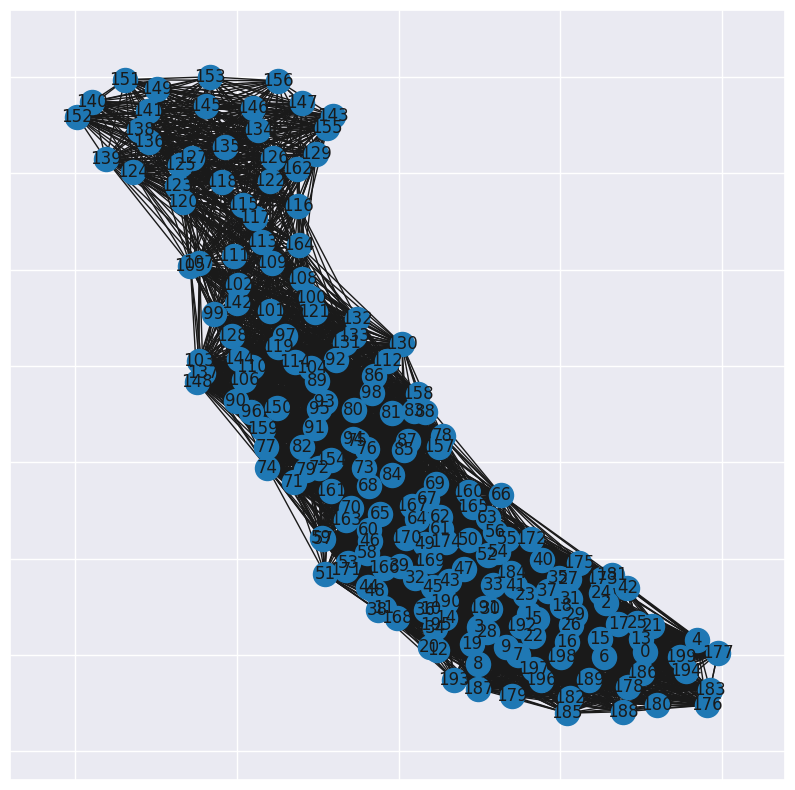

In [13]:
cosine_graph_x = similarity_matrix_to_graph(similarity_cosine_x, threshold=0.9)
plot_graph(cosine_graph_x)

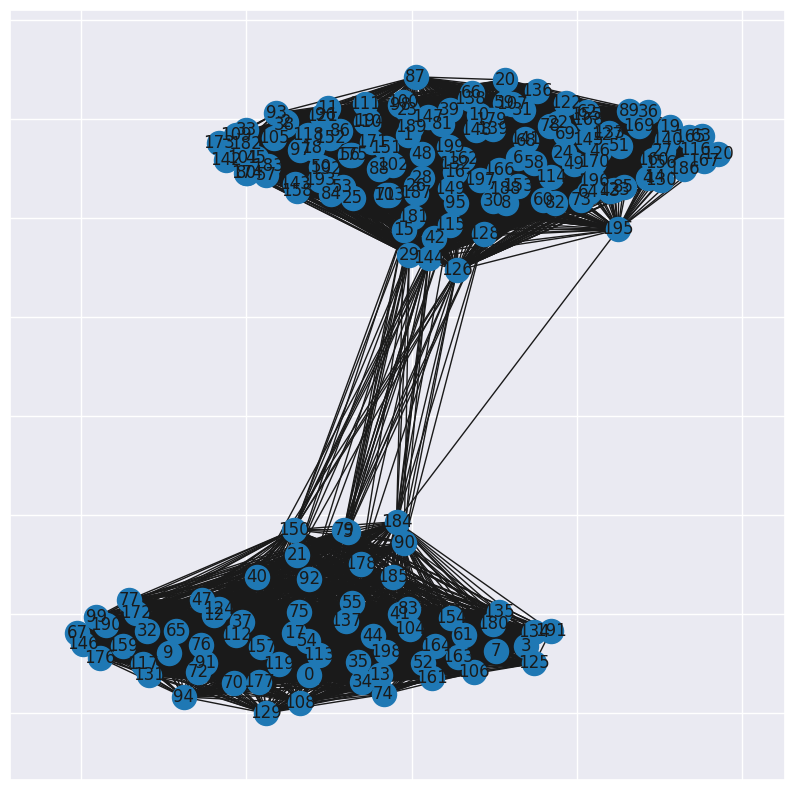

In [14]:
similarity_cosine_y_graph = similarity_matrix_to_graph(similarity_cosine_y, threshold=0.9)
plot_graph(similarity_cosine_y_graph)

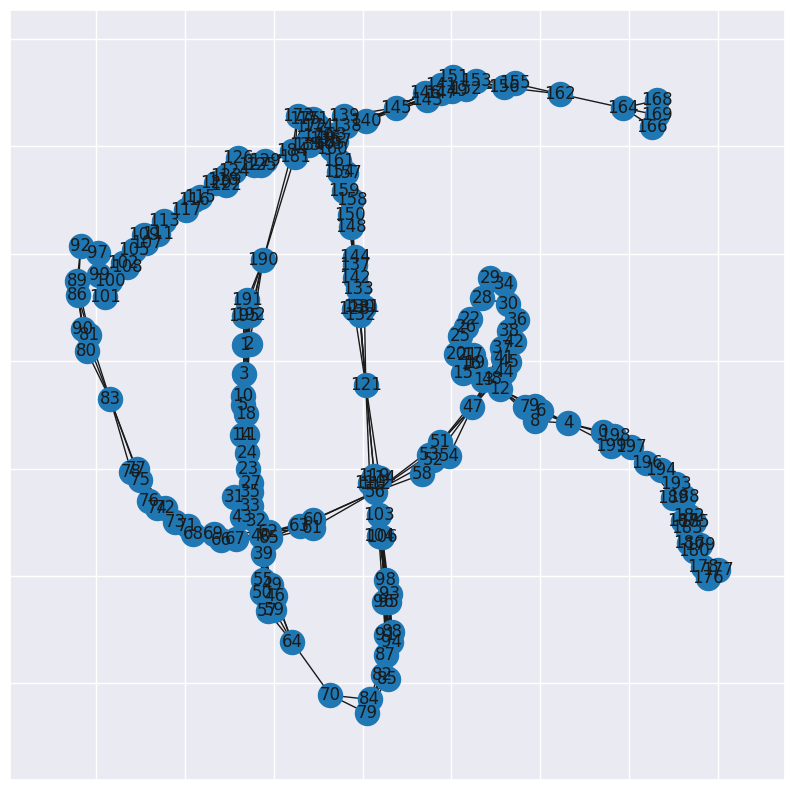

In [15]:
similarity_euclidean_x_graph = similarity_matrix_to_graph(similarity_euclidean_x, threshold=0.5)
plot_graph(similarity_euclidean_x_graph)

# Кластеризация для числа кластеров k=2

In [16]:
hierarchical_clustering_2_euclidean_x = hierarchical_clustering(data_x, euclidean_x, clusters=2, method='single')
hierarchical_clustering_2_chebyshev_x = hierarchical_clustering(data_x, chebyshev_x, clusters=2, method='single')
hierarchical_clustering_2_cosine_x = hierarchical_clustering(data_x, cosine_x, clusters=2, method='single')

kmeans_clustering_2_x = kmeans_clustering(data_x, clusters=2)

em_clustering_2_x = em_clustering(data_x, clusters=2)

spectral_clustering_2_euclidean_x = spectral_clustering(euclidean_x, clusters=2)
spectral_clustering_2_chebyshev_x = spectral_clustering(chebyshev_x, clusters=2)
spectral_clustering_2_cosine_x = spectral_clustering(cosine_x, clusters=2)

hierarchical_clustering_2_euclidean_y = hierarchical_clustering(data_y, euclidean_y, clusters=2, method='single')
hierarchical_clustering_2_chebyshev_y = hierarchical_clustering(data_y, chebyshev_y, clusters=2, method='single')
hierarchical_clustering_2_cosine_y = hierarchical_clustering(data_y, cosine_y, clusters=2, method='single')


kmeans_clustering_2_y = kmeans_clustering(data_y, clusters=2)

em_clustering_2_y = em_clustering(data_y, clusters=2)

clustering_2_euclidean_y = spectral_clustering(euclidean_y, clusters=2)
clustering_2_chebyshev_y = spectral_clustering(chebyshev_y, clusters=2)
clustering_2_cosine_y = spectral_clustering(cosine_y, clusters=2)


# Кластеризация для числа кластеров k=3

In [17]:
hierarchical_clustering_3_euclidean_x = hierarchical_clustering(data_x, euclidean_x, clusters=3, method='single')
hierarchical_clustering_3_chebyshev_x = hierarchical_clustering(data_x, chebyshev_x, clusters=3, method='single')
hierarchical_clustering_3_cosine_x = hierarchical_clustering(data_x, cosine_x, clusters=3, method='single')

kmeans_clustering_3_x= kmeans_clustering(data_x, clusters=3)

em_clustering_3_x = em_clustering(data_x, clusters=3)

clustering_3_euclidean_x = spectral_clustering(euclidean_x, clusters=3)
clustering_3_chebyshev_x = spectral_clustering(chebyshev_x, clusters=3)
clustering_3_cosine_x = spectral_clustering(cosine_x, clusters=3)


hierarchical_clustering_3_euclidean_y = hierarchical_clustering(data_y, euclidean_y, clusters=3, method='single')
hierarchical_clustering_3_chebyshev_y = hierarchical_clustering(data_y, chebyshev_y, clusters=3, method='single')
hierarchical_clustering_3_cosine_y = hierarchical_clustering(data_y, cosine_y, clusters=3, method='single')

kmeans_clustering_3_y = kmeans_clustering(data_y, clusters=3)

em_clustering_3_y = em_clustering(data_y, clusters=3)

clustering_3_euclidean_y = spectral_clustering(euclidean_y, clusters=3)
clustering_3_chebyshev_y = spectral_clustering(chebyshev_y, clusters=3)
clustering_3_cosine_y = spectral_clustering(cosine_y, clusters=3)

# Общий случай